In [1]:
#Import dependencies
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
#Set the executable path and initialize the chrome browser in splinter
executable_path = {'executable_path': ChromeDriverManager().install()}

browser = Browser('chrome', **executable_path, headless=False)

In [3]:
#Visit the mars nasa news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

browser.visit(url)

#Optional delay for loading the page
browser.is_element_present_by_css('table.table', wait_time=1)

True

In [4]:
#Set up the HTML parser
html = browser.html

data_soup = soup(html, 'html.parser')

In [5]:
#Get each table row element
table_rows = data_soup.find_all('tr', class_='data-row'.split())

In [6]:
#Create lists to hold each column data
id_ = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []

In [7]:
#Iterate through each table row and add data to lists
for row in table_rows:
    #Turn each table row into a list with each column as an element
    row_data = row.find_all('td')
    
    #Add each column data to the appropriate list
    #When I try using .astype here, I get an error that says "AttributeError: 'NoneType' object has no attribute 'astype'" even though .info below shows that there is no null data
    id_.append(row_data[0].text)
    terrestrial_date.append(row_data[1].text)
    sol.append(row_data[2].text)
    ls.append(row_data[3].text)
    month.append(row_data[4].text)
    min_temp.append(row_data[5].text)
    pressure.append(row_data[6].text)

In [8]:
#Create dataframe from lists
mars_temp_df = pd.DataFrame({'id': id_, 'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure})

mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [9]:
#Convert columns to appropriate data types
mars_temp_df['id'] = mars_temp_df['id'].astype(int)
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol'] = mars_temp_df['sol'].astype(int)
mars_temp_df['ls'] = mars_temp_df['ls'].astype(int)
mars_temp_df['month'] = mars_temp_df['month'].astype(int)
mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype(float)
mars_temp_df['pressure'] = mars_temp_df['pressure'].astype(float)

In [10]:
#Export dataframe to csv
mars_temp_df.to_csv('mars_temp_data.csv', index=False)

In [11]:
#How many months exist on Mars
mars_months = mars_temp_df['month'].nunique()
print(f'There are {mars_months} months on Mars')

There are 12 months on Mars


In [12]:
#How many Martian days worth of data exist in the dataset

#Prints the answer if the number of rows in the dataframe is equal to the number of unique terrestrial
#dates and the number of unique martian days elapsed since Curiosity landed
if mars_temp_df['terrestrial_date'].nunique() == mars_temp_df['sol'].nunique() & mars_temp_df['terrestrial_date'].nunique() == len(mars_temp_df):
    print(f'There are {len(mars_temp_df)} Martian days worth of data in the dataset')
else:
    print('False')

There are 1867 Martian days worth of data in the dataset


<AxesSubplot:>

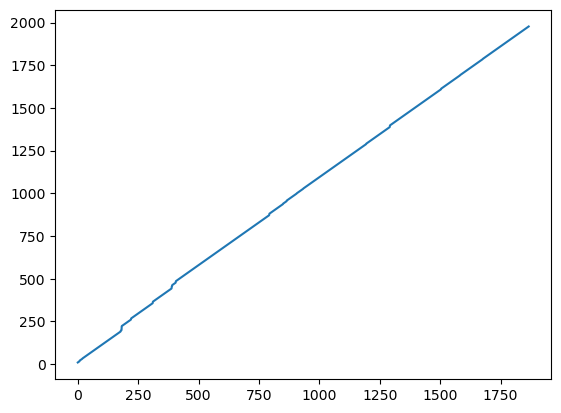

In [13]:
mars_temp_df['sol'].plot()

#As seen here, the number of days elapsed since Curiosity landed on Mars is not exactly linear and we
#therefore need to do the above cell to find the answer

#This all shows that each row in the dataframe is a unique day on Mars and the number of Martian days
#in the dataset is equal to its row count and not equal to the (max - min) of the sol column

The coldest month on Mars is 3 and the warmest month is 8


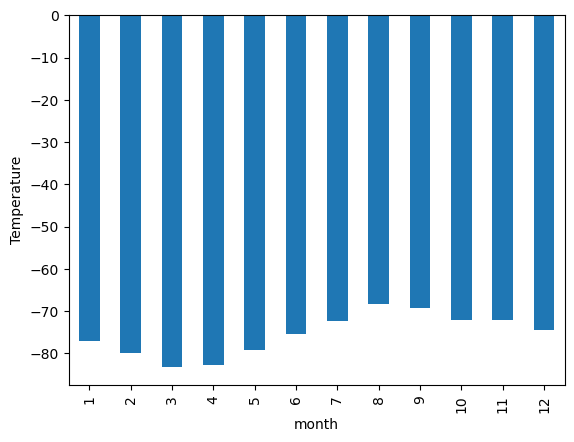

In [14]:
#What are the coldest and warmest months on Mars (at the locations of Curiosity)
mars_coldest_months = mars_temp_df.groupby('month').mean()['min_temp']
mars_coldest_months.plot.bar().set_ylabel('Temperature')

print(f'The coldest month on Mars is {mars_coldest_months.idxmin()} and the warmest month is {mars_coldest_months.idxmax()}')

The lowest pressure month on Mars is 6 and the highest pressure month is 9


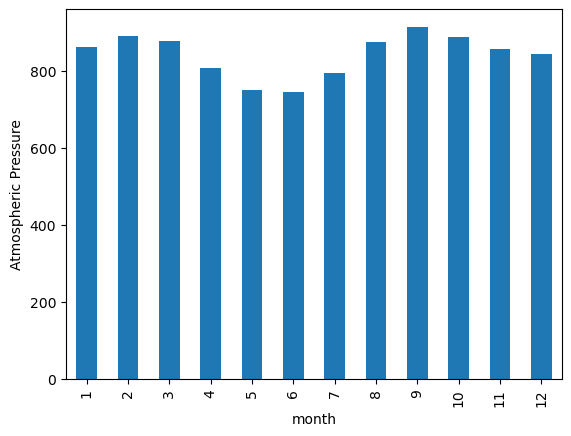

In [15]:
#What months have the lowest and the highest atmospheric pressure on Mars (at the locations of Curiosity)
mars_atmo_pressure = mars_temp_df.groupby('month').mean()['pressure']
mars_atmo_pressure.plot.bar().set_ylabel('Atmospheric Pressure')

print(f'The lowest pressure month on Mars is {mars_atmo_pressure.idxmin()} and the highest pressure month is {mars_atmo_pressure.idxmax()}')

There are about 646 terrestrial days in a Martian year


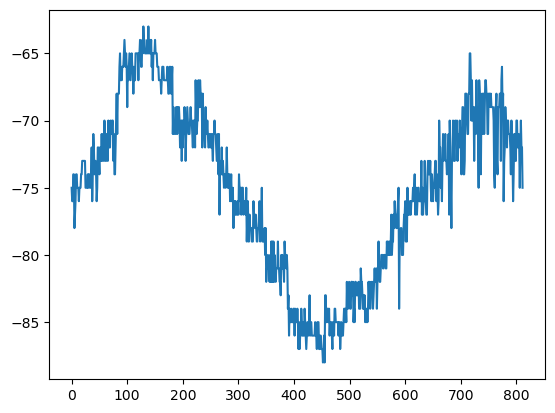

In [16]:
#About how many terrestrial days exist in a Martian year
mars_year = mars_temp_df['min_temp'].where(mars_temp_df['sol'] < 900)
mars_years_sorted = mars_year.sort_values(ascending=False).reset_index(drop=True)
mars_year.plot()

#Assuming that the Martian year is evenly split between increasing and decreasing temperatures
print(f'There are about {round((mars_year.idxmin() - mars_year.idxmax()) * 2)} terrestrial days in a Martian year')